# PART 1

i) Create a multiple linear regression model that would predict the rating based on all the available features (except year and name) using linear algebra approach (inv or pinv). Provide the model parameters.

In [239]:
import numpy as np 
import pandas as pd
from numpy.linalg import inv
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('QB2022_MLR.csv')
df.head()

,Year,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate
0,2022,Jared Goff,4438,7.6,587,382,65.1,29,7,99.3
1,2022,Josh Allen,4283,7.6,567,359,63.3,35,14,96.6
2,2022,Geno Smith,4282,7.5,572,399,69.8,30,11,100.9
3,2022,Trevor Lawrence,4113,7.0,584,387,66.3,25,8,95.2
4,2022,Jalen Hurts,3701,8.0,460,306,66.5,22,6,101.6


In [241]:
df = df.drop(columns = ['Year','Player'] )
df.head()

,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate
0,4438,7.6,587,382,65.1,29,7,99.3
1,4283,7.6,567,359,63.3,35,14,96.6
2,4282,7.5,572,399,69.8,30,11,100.9
3,4113,7.0,584,387,66.3,25,8,95.2
4,3701,8.0,460,306,66.5,22,6,101.6


In [243]:
b = np.array(df['Rate'])
b.shape


(70,)

In [294]:
A = np.hstack(([np.ones((df.shape[0],1)), df.iloc[:,:7]]))
A.shape


(70, 8)

Linear ALgebra Method
$$
X = A^T * A^-1 * A^T *b
$$

In [247]:
x = inv(A.T@A)@A.T@b
x

array([-4.27770064e+01, -6.69029754e-03,  4.52455396e+00,  2.65961280e-01,
       -3.34880718e-01,  1.47996495e+00,  1.40284500e+00, -2.28659449e+00])

ii) Repeat the above using the library in sklearn. Provide the model parameters.

In [250]:
reg = linear_model.LinearRegression()
reg

LinearRegression()

In [252]:
reg.fit(np.array(A),np.array(b))

LinearRegression()

In [254]:
reg.fit(np.array(df.iloc[:,:7]),np.array(df['Rate']))
reg.intercept_, reg.coef_

(-42.77700636486907,
 array([-0.0066903 ,  4.52455396,  0.26596128, -0.33488072,  1.47996495,
         1.402845  , -2.28659449]))

iii) Make a prediction for each player in QB2022_MLR_test.csv  Download QB2022_MLR_test.csv  and print the result.

In [257]:
df1 = pd.read_csv('QB2022_MLR_test.csv')
df1

,Year,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate
0,2022,Patrick Mahomes,5250,8.1,648,435,67.1,41,12,105.2
1,2022,Justin Herbert,4739,6.8,699,477,68.2,25,10,93.2
2,2022,Tom Brady,4694,6.4,733,490,66.8,25,9,90.7
3,2022,Kirk Cousins,4547,7.1,643,424,65.9,29,14,92.5
4,2022,Joe Burrow,4475,7.4,606,414,68.3,35,12,100.8


In [259]:
df1 = df1.drop(columns = ['Year','Player'])
df1

,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate
0,5250,8.1,648,435,67.1,41,12,105.2
1,4739,6.8,699,477,68.2,25,10,93.2
2,4694,6.4,733,490,66.8,25,9,90.7
3,4547,7.1,643,424,65.9,29,14,92.5
4,4475,7.4,606,414,68.3,35,12,100.8


In [261]:
df1.shape

(5, 8)

In [263]:
x = df1.iloc[:,:7]
x.shape

(5, 7)

In [265]:
y = df1['Rate']

iv) Make a prediction for each player in QB2022_MLR_test.csv  Download QB2022_MLR_test.csv  and print the result.

In [268]:
pred = reg.predict(np.array(x))
pred

array([114.8007751 ,  95.59226257,  98.98738212,  94.15009489,
       106.03957719])

In [270]:
from sklearn.metrics import mean_squared_error
mse_few = mean_squared_error(np.array(y),pred)
mse_few

39.35089751301097

# PART 2


## Feature Engineering 

In [274]:
df1.head()

,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate
0,5250,8.1,648,435,67.1,41,12,105.2
1,4739,6.8,699,477,68.2,25,10,93.2
2,4694,6.4,733,490,66.8,25,9,90.7
3,4547,7.1,643,424,65.9,29,14,92.5
4,4475,7.4,606,414,68.3,35,12,100.8


a) Create a new feature called "Cmp/Att" that is the ratio of completions to number of attempts. Use the Cmp and Att columns to calculate the new feature.
b) Create a new feature called "TD/Att" that is the ratio of touchdowns to number of attempts. Use the TD and Att columns to calculate the new feature.

In [277]:
df1['Cmp/Att'] = df1['Cmp'] / df1['Att']
df1['TD/Att']= df1['TD'] /df1['Att']
df1.head()

,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate,Cmp/Att,TD/Att
0,5250,8.1,648,435,67.1,41,12,105.2,0.671296,0.063272
1,4739,6.8,699,477,68.2,25,10,93.2,0.682403,0.035765
2,4694,6.4,733,490,66.8,25,9,90.7,0.668486,0.034106
3,4547,7.1,643,424,65.9,29,14,92.5,0.659409,0.045101
4,4475,7.4,606,414,68.3,35,12,100.8,0.683168,0.057756


In [279]:
X_new = df1[['Yds/Att','Cmp/Att','TD/Att']]
X_new.shape

(5, 3)

In [281]:
y_new = df1['Rate']

c) Use sklearn to create a multiple linear regression model that would predict the rating based on 3 features: "Yds/Att", "Cmp/Att", and "TD/Att". Provide the model parameters.

In [284]:
reg = linear_model.LinearRegression()
reg

LinearRegression()

In [290]:
reg.fit(np.array(X_new),np.array(y_new))

LinearRegression()

In [292]:
pred1 = reg.predict(np.array(X_new))
pred1

array([104.22865213,  93.64916722,  89.36105543,  93.79833576,
       101.36278946])

In [211]:
from sklearn.metrics import mean_squared_error
mse_more = mean_squared_error(np.array(y_new),pred1)
mse_more

16.288867228233048

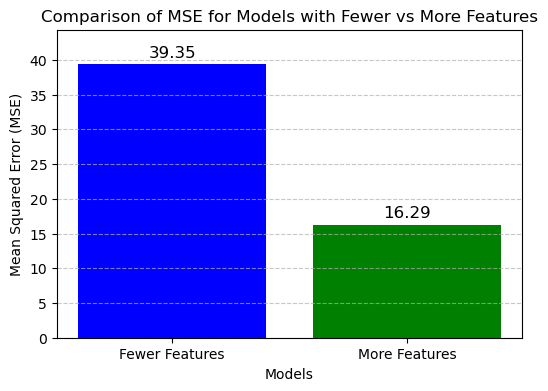

In [298]:
#pyplot for MSE comparison
mse_values = [mse_few, mse_more]
models = ['Fewer Features', 'More Features']

plt.figure(figsize=(6,4))
plt.bar(models, mse_values, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE for Models with Fewer vs More Features')
plt.ylim(0, max(mse_values) + 5)

# Annotating the bars with MSE values
for i, v in enumerate(mse_values):
    plt.text(i, v + 1, f"{v:.2f}", ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The bar corresponding to the model with more features will be much shorter than the one with fewer features , clearly indicating that the model with more features performs better.
A lower bar (lower MSE) means the model has better performance, as it makes fewer prediction errors.

The graph reinforces the earlier conclusion that the model with fewer features is more accurate, as it has a noticeably lower MSE. In contrast, the model with more features likely incorporates irrelevant or noisy data, leading to a higher error rate, reflected by the higher MSE.